# Heart Disease Prediction

In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to predict whether any person is suffering from heart disease

### Lets Import some Library

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we will be experimenting with 3 algorithms

1.Logistic Regression

2.KNeighborsClassifier

3.DecisionTreeClassifier

4.RandomForestClassifier

In [2]:
# import some libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Lets read Dataset

In [3]:
# import csv file 
df = pd.read_csv('Heart disease dataset.csv')

In [4]:
# Check Head
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Columns description:**

**age:** age in years

**sex:** (1 = male; 0 = female)

**cp:** chest pain type

**trestbps:** resting blood pressure (in mm Hg on admission to the hospital)

**chol:** serum cholestoral in mg/dl

**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg:** resting electrocardiographic results

**thalach:** maximum heart rate achieved

**exang:** exercise induced angina (1 = yes; 0 = no)

**oldpeak:** ST depression induced by exercise relative to rest

**slope:** the slope of the peak exercise ST segment

**ca:** number of major vessels (0-3) colored by flourosopy

**thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect

**target:** refers to the presence of heart disease in the patient (1=yes, 0=no)


In [5]:
# Lets check shape
df.shape

(303, 14)

In [6]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Describe the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Checking null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Visualization

### Univariate Datavisualization

In [9]:
# Lets Visualize Age Column
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

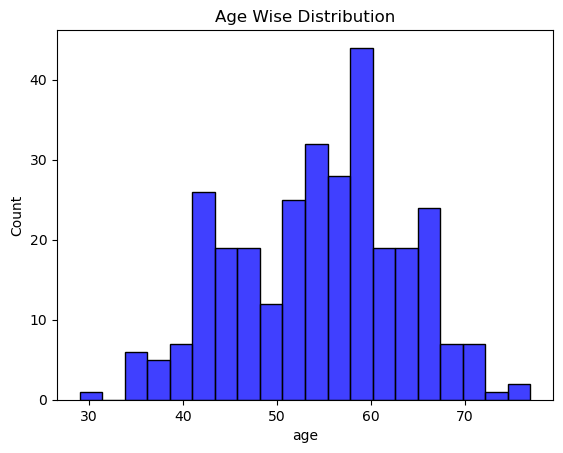

In [10]:
sns.histplot(x = df['age'],bins = 20,color = 'Blue')
plt.title('Age Wise Distribution')
plt.show()

From the above chart we analyze that heart in the age of 58 to 60 years having maximum number of patient have heart disease and in the age of 30 years minimum number of patient.


In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='target', ylabel='count'>

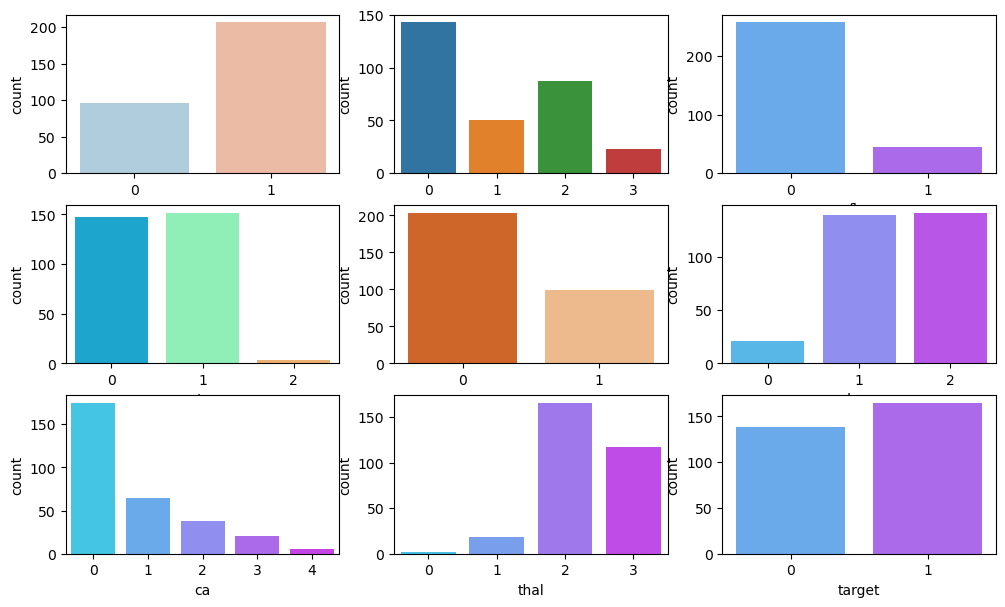

In [12]:
# lets visualize categorical columns 
fig,axes=plt.subplots(3,3,figsize=(12,7))

sns.countplot(data=df,x=df['sex'],palette='RdBu_r',ax=axes[0,0])
sns.countplot(data=df,x=df['cp'],ax=axes[0,1])
sns.countplot(data=df,x=df['fbs'],palette='cool',ax=axes[0,2])
sns.countplot(data=df,x=df['restecg'],palette='rainbow',ax=axes[1,0])
sns.countplot(data=df,x=df['exang'],palette='Oranges_r',ax=axes[1,1])
sns.countplot(data=df,x=df['slope'],palette='cool',ax=axes[1,2])
sns.countplot(data=df,x=df['ca'],palette='cool',ax=axes[2,0])
sns.countplot(data=df,x=df['thal'],palette='cool',ax=axes[2,1])
sns.countplot(data=df,x=df['target'],palette='cool',ax=axes[2,2])


<Axes: xlabel='oldpeak', ylabel='Count'>

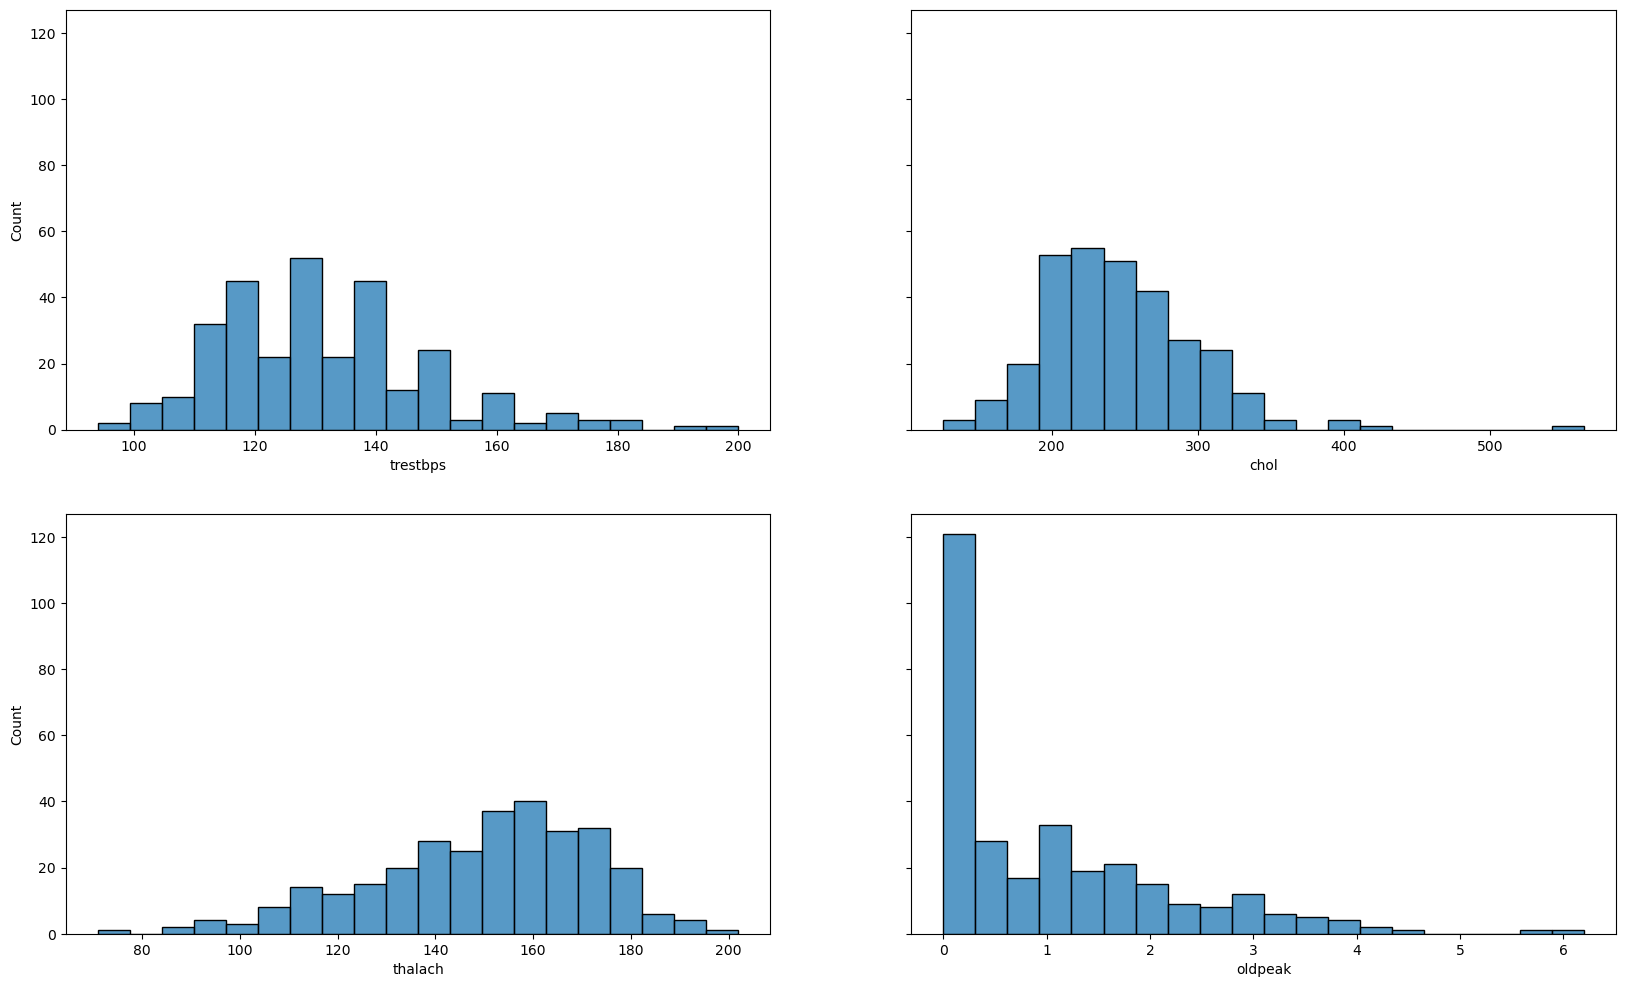

In [13]:
# Lets visualize numeric column
fig,axes=plt.subplots(2,2,figsize=(20,12),sharey=True)

sns.histplot(df['trestbps'],bins = 20,ax=axes[0,0])
sns.histplot(df['chol'],bins = 20,ax=axes[0,1])
sns.histplot(df['thalach'],bins = 20,ax=axes[1,0])
sns.histplot(df['oldpeak'],bins = 20,ax=axes[1,1])



## Bivariate Data Visualization

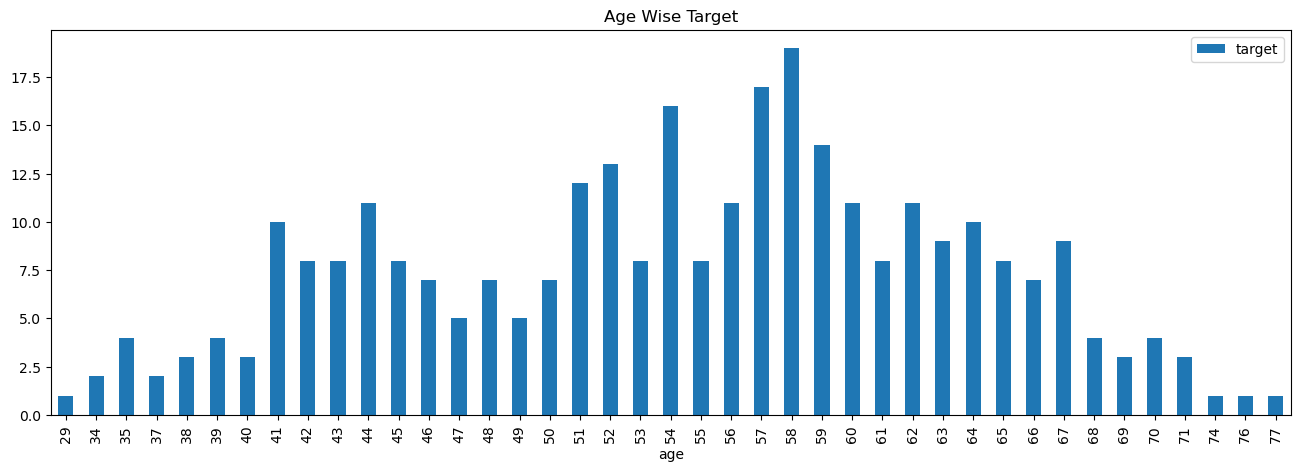

In [14]:
# lets visualyze Age and target column
plt.rcParams['figure.figsize'] = (16, 5)
df[['age','target']].groupby(['age']).count().plot(kind = 'bar')
plt.title('Age Wise Target')
plt.show()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64


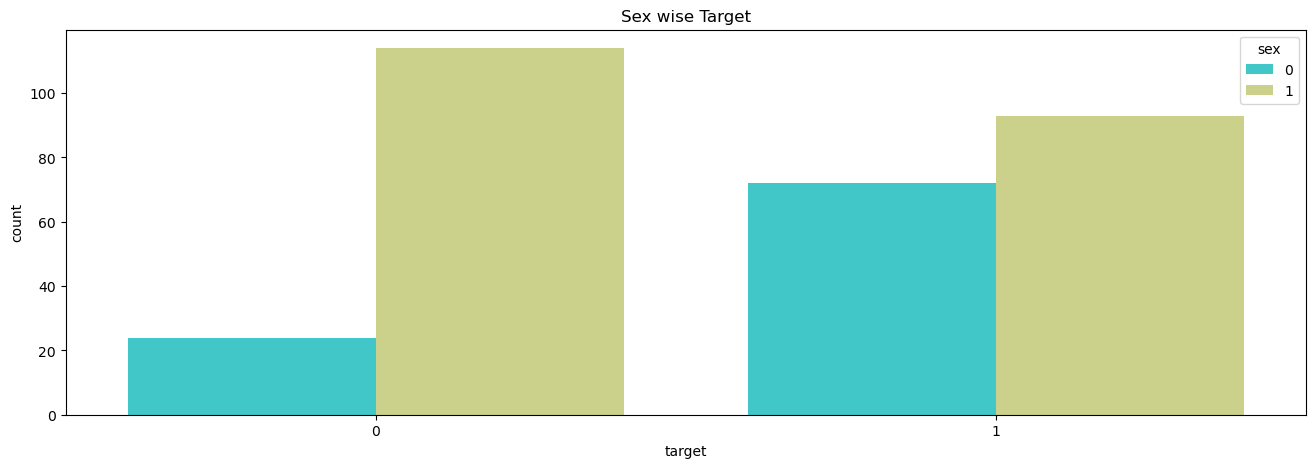

In [15]:
# lets visualyze sex and target column
print(df['target'].groupby(df['sex']).value_counts())
sns.countplot(data=df,x='target',hue='sex',palette='rainbow')
plt.title('Sex wise Target')
plt.show()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64


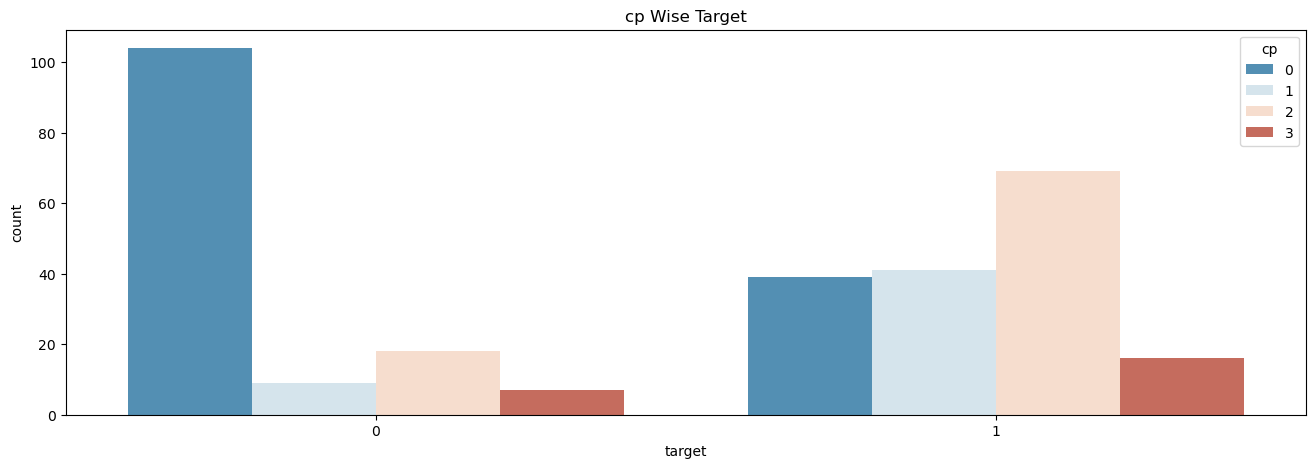

In [16]:
# lets visualyze cp and target column
print(df['target'].groupby(df['cp']).value_counts())
sns.countplot(data=df,x='target',hue='cp',palette='RdBu_r')
plt.title('cp Wise Target')
plt.show()


fbs  target
0    1         142
     0         116
1    1          23
     0          22
Name: target, dtype: int64


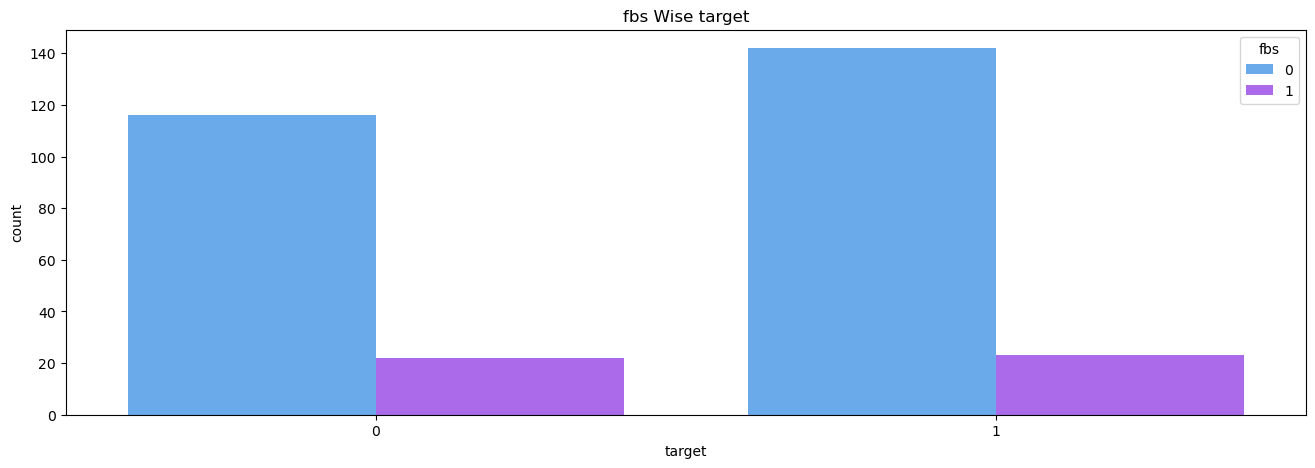

In [17]:
# lets visualyze fbs and target column
print(df['target'].groupby(df['fbs']).value_counts())
sns.countplot(data=df,x='target',hue='fbs',palette='cool')
plt.title('fbs Wise target')
plt.show()


restecg  target
0        0         79
         1         68
1        1         96
         0         56
2        0          3
         1          1
Name: target, dtype: int64


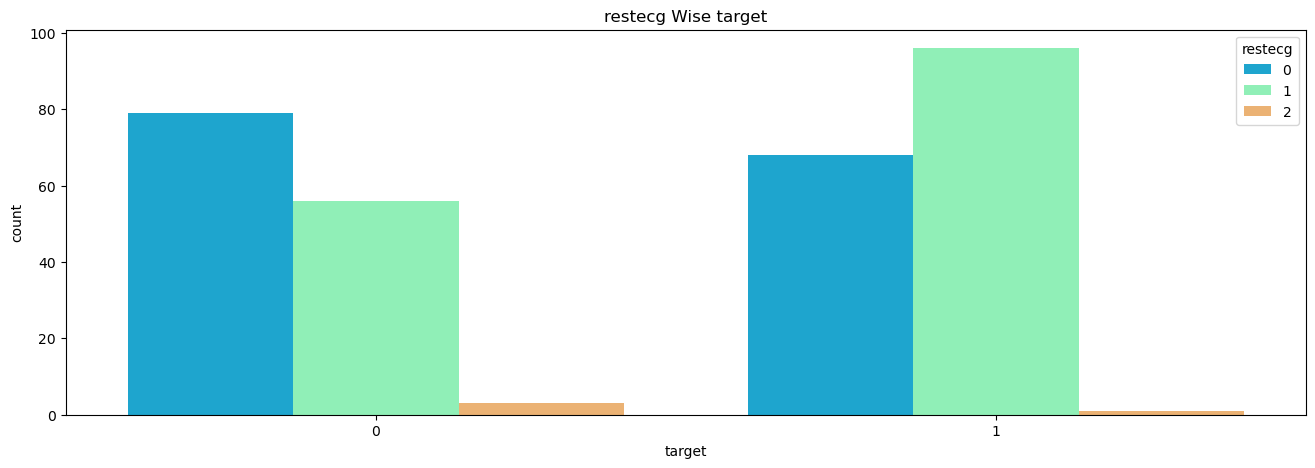

In [18]:
# lets visualyze restecg and target column
print(df['target'].groupby(df['restecg']).value_counts())
sns.countplot(data=df,x='target',hue='restecg',palette='rainbow')
plt.title('restecg Wise target')
plt.show()


exang  target
0      1         142
       0          62
1      0          76
       1          23
Name: target, dtype: int64


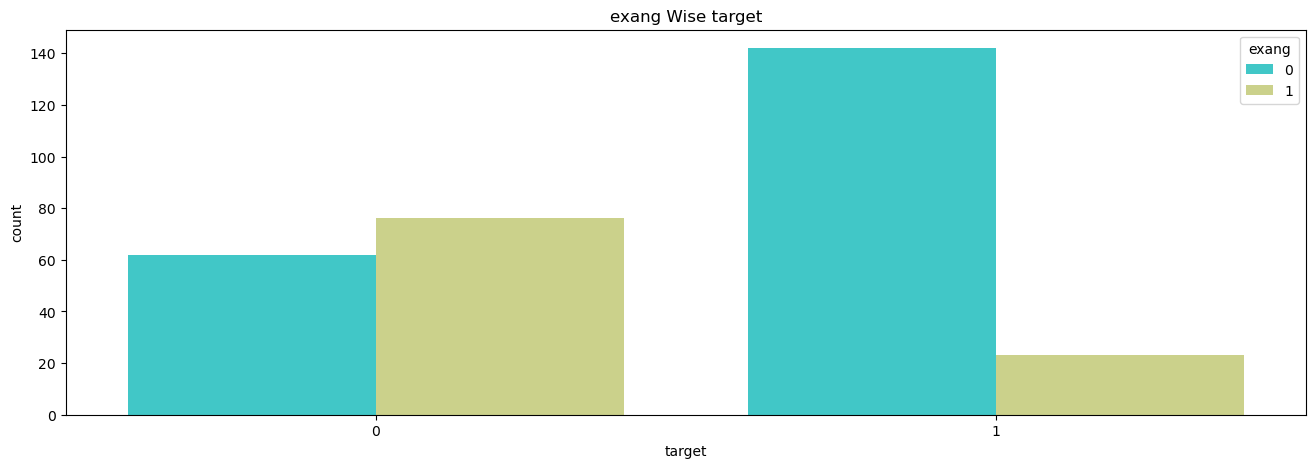

In [19]:
# lets visualyze exang and target column
print(df['target'].groupby(df['exang']).value_counts())
sns.countplot(data=df,x='target',hue='exang',palette='rainbow')
plt.title('exang Wise target')
plt.show()


slope  target
0      0          12
       1           9
1      0          91
       1          49
2      1         107
       0          35
Name: target, dtype: int64


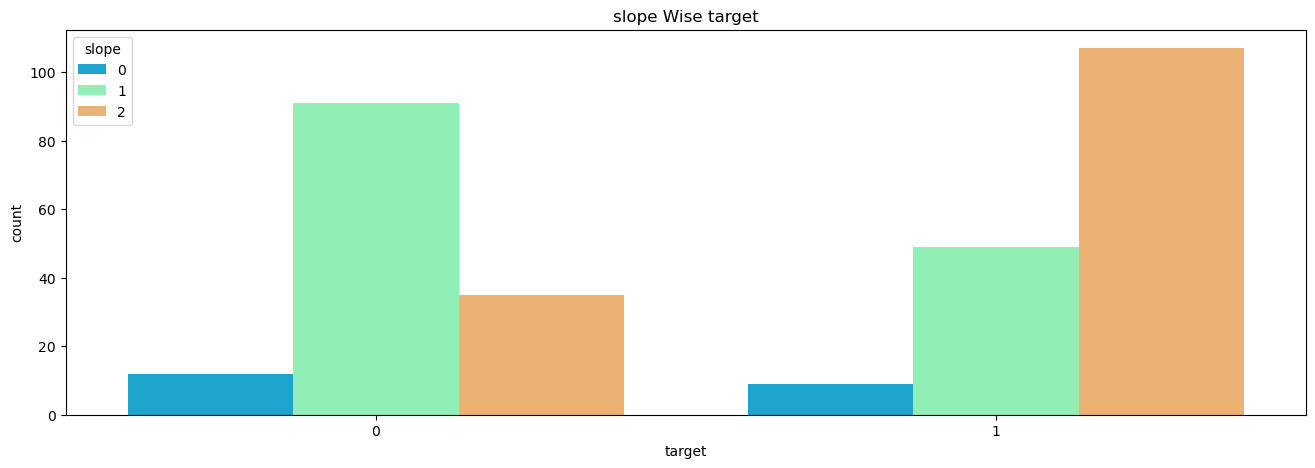

In [20]:
# lets visualyze slope and target column
print(df['target'].groupby(df['slope']).value_counts())
sns.countplot(data=df,x='target',hue='slope',palette='rainbow')
plt.title('slope Wise target')
plt.show()


ca  target
0   1         130
    0          45
1   0          44
    1          21
2   0          31
    1           7
3   0          17
    1           3
4   1           4
    0           1
Name: target, dtype: int64


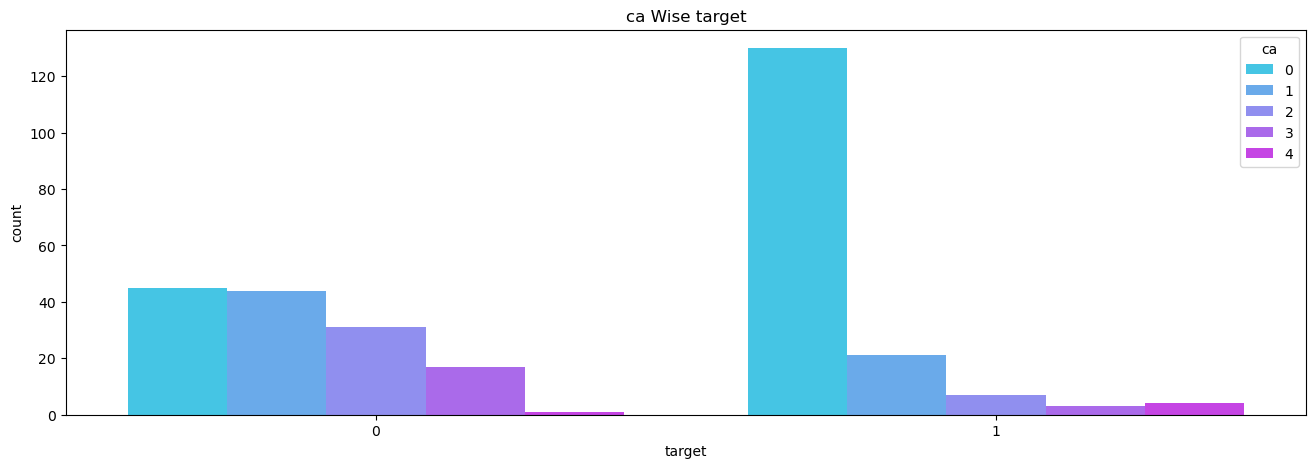

In [21]:
# # lets visualyze ca and target column
print(df['target'].groupby(df['ca']).value_counts())
sns.countplot(data=df,x='target',hue='ca',palette='cool')
plt.title('ca Wise target')
plt.show()

thal  target
0     0           1
      1           1
1     0          12
      1           6
2     1         130
      0          36
3     0          89
      1          28
Name: target, dtype: int64


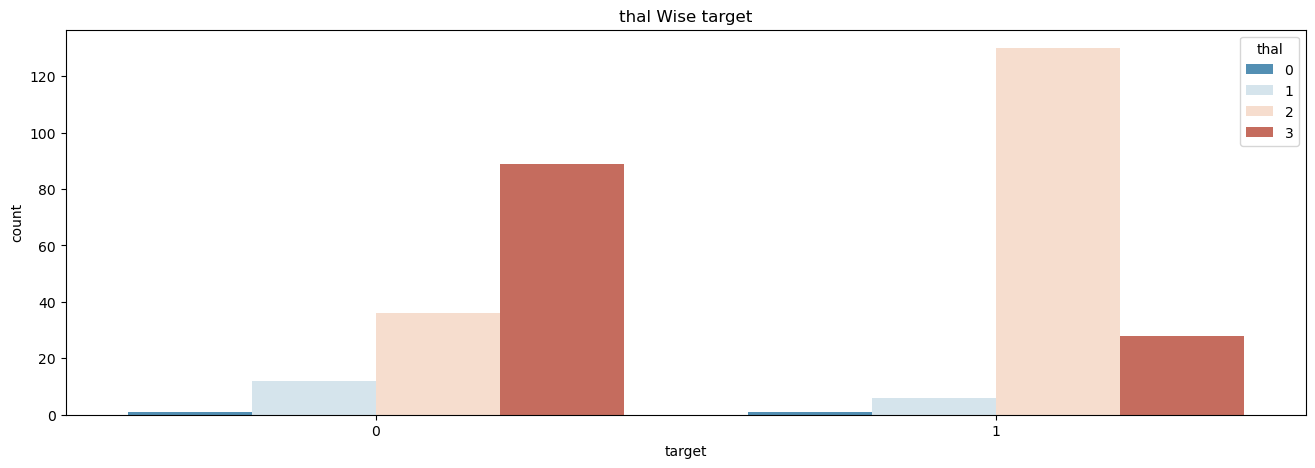

In [22]:
# lets visualyze thal and target column
print(df['target'].groupby(df['thal']).value_counts())
sns.countplot(data=df,x='target',hue='thal',palette='RdBu_r')
plt.title('thal Wise target')
plt.show()

 

## Multivariate Visualization

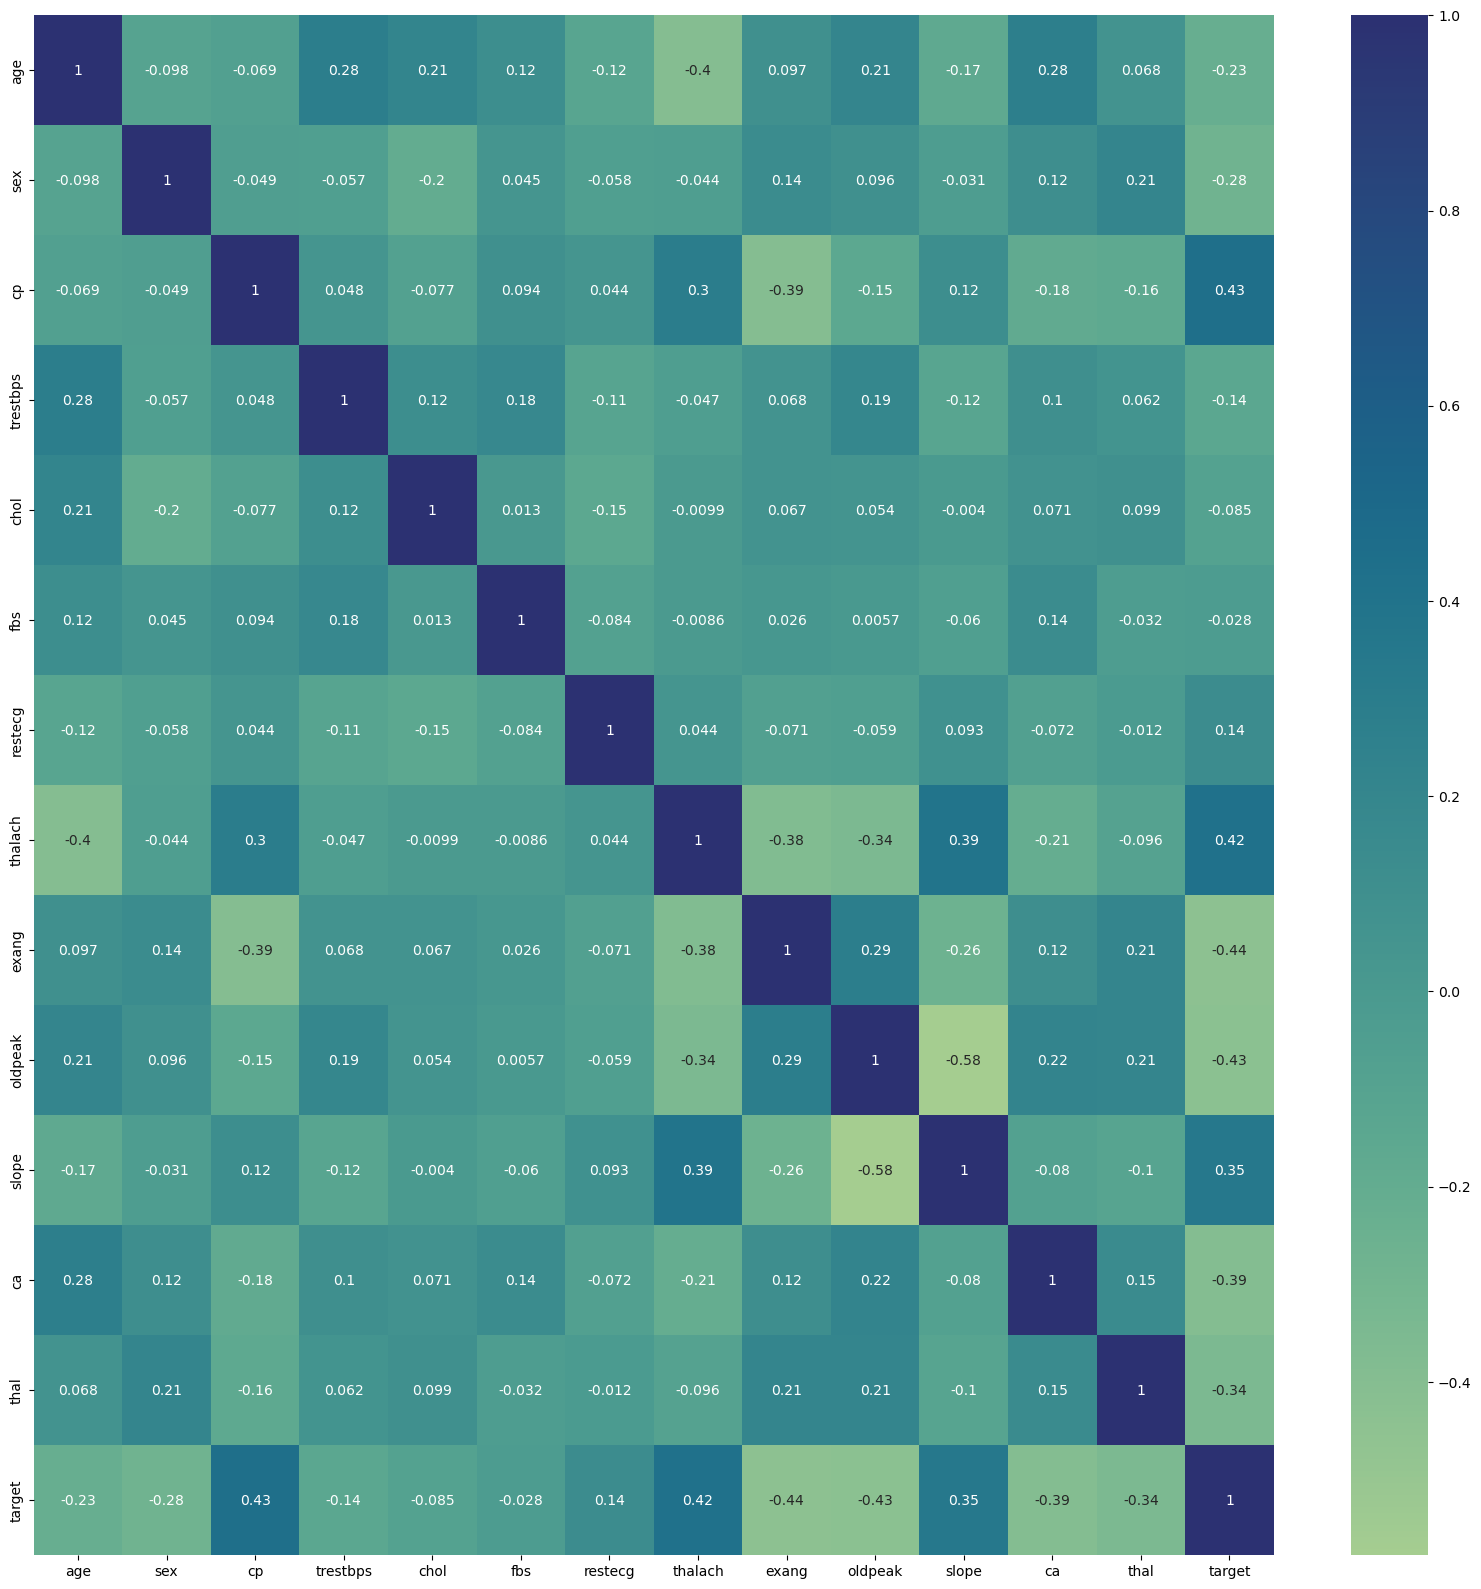

In [23]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="crest")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

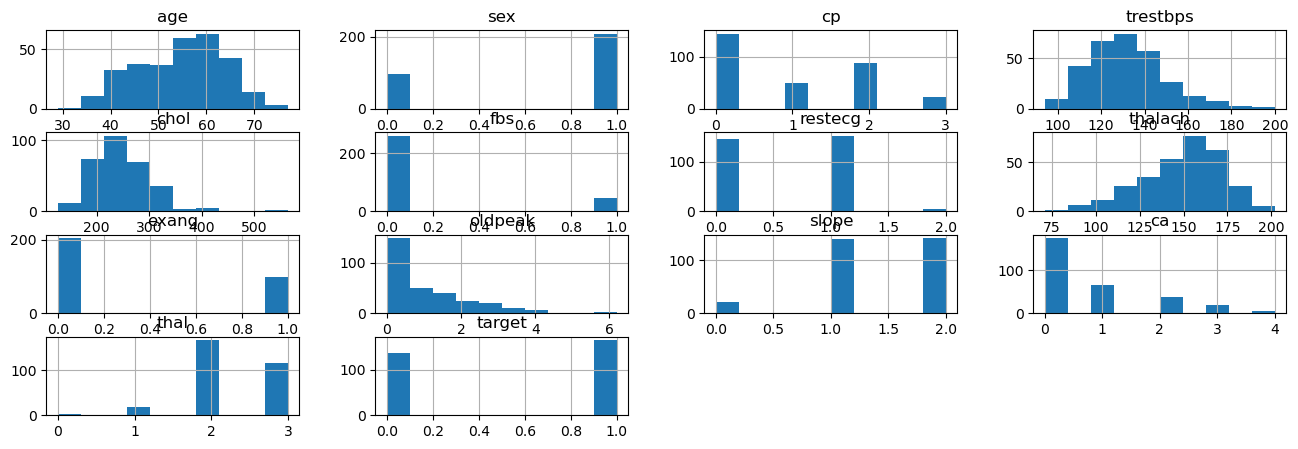

In [24]:
df.hist()

## Data Processing 

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [25]:
# Change Categorical columns in dummies
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [26]:
# Scaling Numeric columns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [27]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [28]:
# Define X and y
y = df['target']
X = df.drop(['target'], axis = 1)

In [29]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((242, 30), (61, 30))

# Logistic Regression

In [31]:
# Lets check model on training dataset
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [32]:
lr_pred = lr.predict(X_train)
lr_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1],
      dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [34]:
training_recall = recall_score(y_train, lr_pred)
training_precision = precision_score(y_train, lr_pred, zero_division=1)
train_f1_score = f1_score(y_train, lr_pred)
conf_train = confusion_matrix(y_train, lr_pred)
    
print(f'Training Confusion Score: {conf_train}')
print(f'Training Recall Score: {training_recall}')
print(f'Training Precision Score: {training_precision:.2f}')
print(f'Training F1 Score: {train_f1_score}')

Training Confusion Score: [[ 90  21]
 [ 13 118]]
Training Recall Score: 0.9007633587786259
Training Precision Score: 0.85
Training F1 Score: 0.8740740740740741


In [35]:
lr_pred1 = lr.predict(X_test)
lr_pred1

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [36]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, lr_pred1)
print("lr.Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, lr_pred1))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_pred1))


lr.Accuracy: 0.8852459016393442

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61


Confusion Matrix:
[[23  4]
 [ 3 31]]


In [37]:
# Define accuracy as lr.Accuracy
lr.Accuracy = accuracy
print(lr.Accuracy)

0.8852459016393442


In [38]:
# Save Accuracy in one result dataframe
resultsDf = pd.DataFrame({'Accuracy': [lr.Accuracy]},index=['Logistic Regression'])
resultsDf

,Accuracy
Logistic Regression,0.885246


# KNN Classifier

In [39]:
 # Range of k values to test
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = range(1, 31)
cv_scores = []

# Perform 10-fold cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

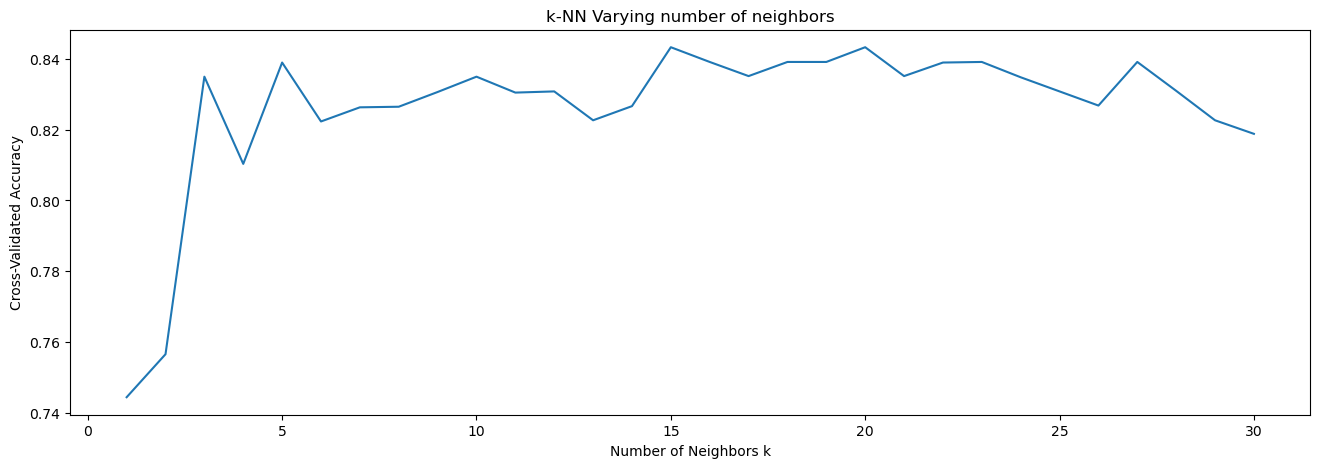

In [40]:
 # Plotting the results
import matplotlib.pyplot as plt
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN Varying number of neighbors')
plt.show()

In [41]:
 # Print the best k
best_k = k_values[np.argmax(cv_scores)]
print(f"The best value of k is {best_k} with cross-validated accuracy of {max(cv_scores):.2f}")

The best value of k is 15 with cross-validated accuracy of 0.84


In [42]:
 # Train the kNN classifier with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [43]:
# Make predictions on the test set
y_pred = best_knn.predict(X_test)

In [44]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN.Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

KNN.Accuracy: 0.8360655737704918

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


Confusion Matrix:
[[21  6]
 [ 4 30]]


In [45]:
# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(best_knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(best_knn.score(X_test, y_test)))

Training set score: 0.8388
Test set score: 0.8361


In [46]:
# Define Accuracy as knn.Accuracy
knn.Accuracy = accuracy
print(knn.Accuracy)

0.8360655737704918


In [47]:
# Save the knn.Accuracy in Resultdf_2 and append it in result_df
resultsDf_2 = pd.DataFrame({'Accuracy': [knn.Accuracy]},index=['KNearest Neighbour'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Accuracy
Logistic Regression,0.885246
KNearest Neighbour,0.836066


# Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
import os

In [50]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [51]:
# checking the oob score
classifier_rf.oob_score_

0.8181818181818182

In [52]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [53]:
grid_search.best_score_

0.8308743169398908

In [54]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=20, n_estimators=10,
                       n_jobs=-1, random_state=42)

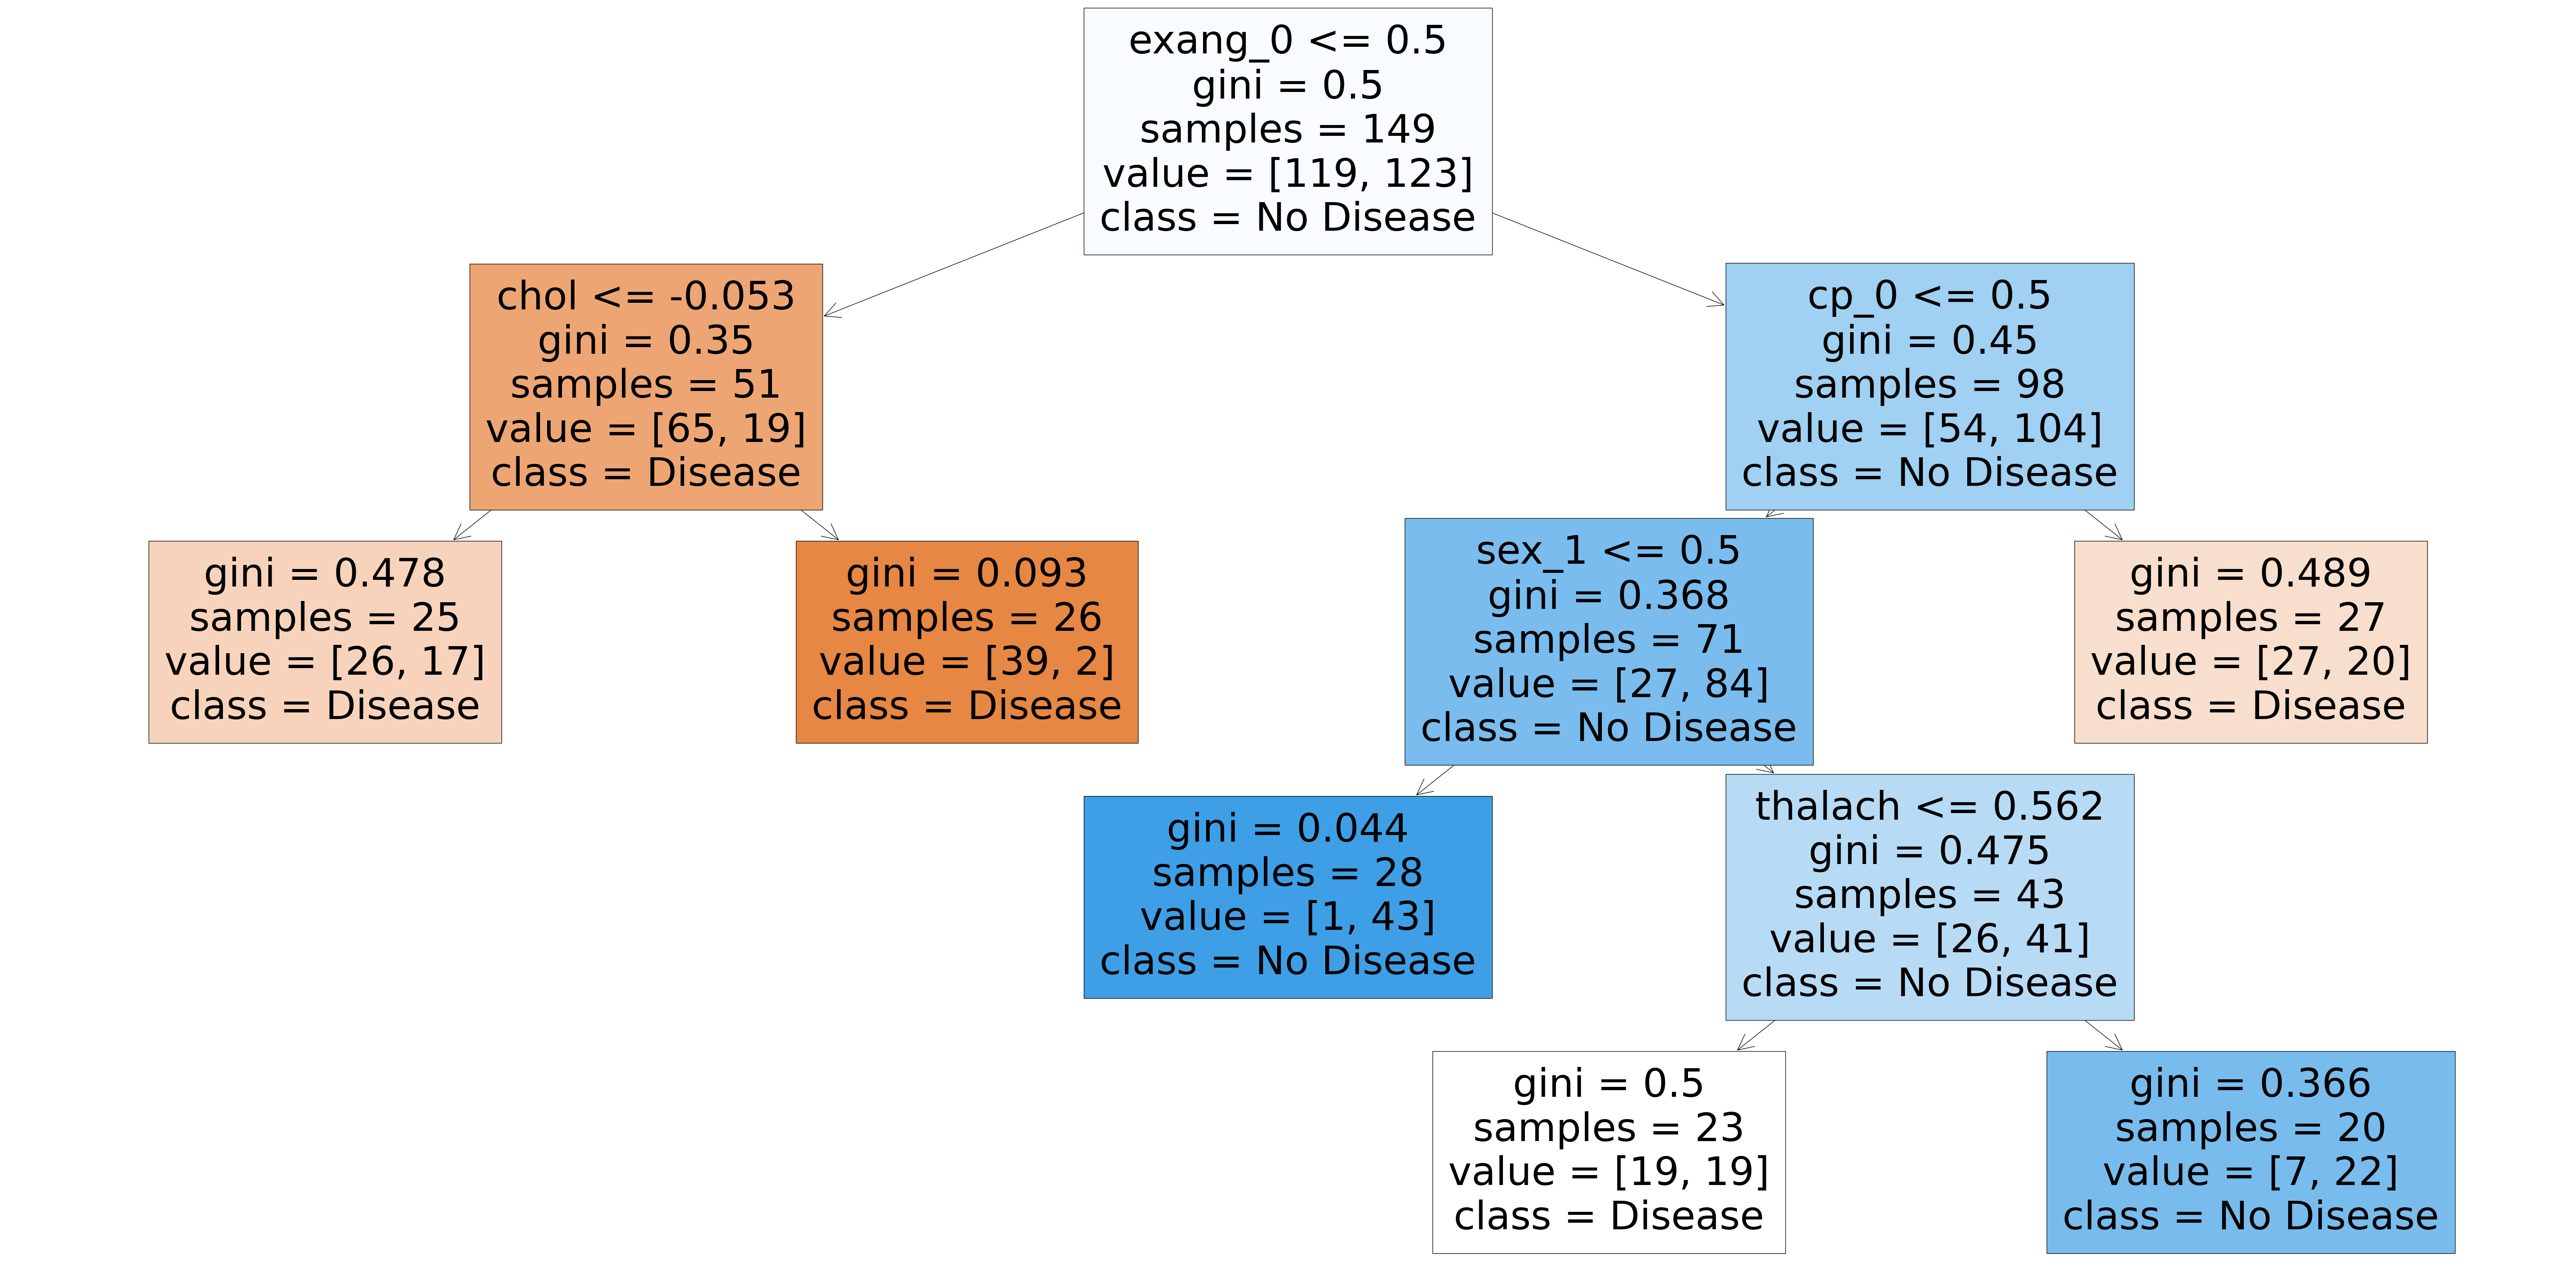

In [55]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [56]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("RF.Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

RF.Accuracy: 0.8360655737704918

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


Confusion Matrix:
[[21  6]
 [ 4 30]]


In [57]:
# Define Accuracy as knn.Accuracy
rf.Accuracy = accuracy
print(rf.Accuracy)

0.8360655737704918


In [58]:
# Save the rf.Accuracy in Resultdf_3 and append it in result_df
resultsDf_3 = pd.DataFrame({'Accuracy': [rf.Accuracy]},index=['Random Forest Classifier'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Accuracy
Logistic Regression,0.885246
KNearest Neighbour,0.836066
Random Forest Classifier,0.836066


# XGBoost Classifier

In [59]:
# Convert data to DMatrix
import xgboost as xgb
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test)

In [60]:
n_classes = len(np.unique(y_train)) # Or df['Channel'].nunique()
n_classes

2

In [61]:
# Define parameters for Multinomial classification
params = {
    'objective': 'multi:softmax',  # Multinomial classification objective
    'num_class': n_classes,
    'max_depth': 4,                  # Maximum depth of trees
    'learning_rate': 0.1,            # Learning rate
    'eval_metric': 'mlogloss',        # Evaluation metric
}

In [62]:
# Train the model
xgb_model = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round=100)

In [63]:
# make predictions on test data
y_pred = xgb_model.predict(test_dmatrix) # Use test_dmatrix instead of X_test

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # For multi-class
recall = recall_score(y_test, y_pred, average='weighted') # For multi-class
f1 = f1_score(y_test, y_pred, average='weighted') # For multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Accuracy: 0.8689
Precision: 0.8714
Recall: 0.8689
F1 Score: 0.8692


In [65]:
# Define Accuracy as xgb.Accuracu
xgb.Accuracy = accuracy
print(xgb.Accuracy)

0.8688524590163934


In [66]:
# Save the xgb.Accuracy in Resultdf_4 and append it in result_df
resultsDf_4 = pd.DataFrame({'Accuracy': [xgb.Accuracy]},index=['XGBoost Classifier'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Accuracy
Logistic Regression,0.885246
KNearest Neighbour,0.836066
Random Forest Classifier,0.836066
XGBoost Classifier,0.868852


From the above table we can conclude that Logistic Regression is the best model for our dataset which accuracybis 0.885246 is more than other models.